In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer

# Load dataset
data = pd.read_csv("advertising.csv")

# Show first 5 rows
print("\nDataset Preview:")
print(data.head(200))


Dataset Preview:
        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [2]:
# Show missing values
print("\nMissing Values Check:")
print(data.isnull().sum())


Missing Values Check:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [7]:
X = data.drop("Sales", axis=1)
y = data["Sales"]

print("\nFeatures and Target Prepared")
print("X:")
print(X.head(200))
print("\ny:")
print(y.head(200))


Features and Target Prepared
X:
        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]

y:
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("\nData Split:")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Data Split:
Training samples: 160
Testing samples: 40


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Trained")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Model Trained
Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214134


In [15]:
y_pred = model.predict(X_test)

print("\nAll Predictions:")
print(y_pred)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")



All Predictions:
[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]

Model Evaluation:
Mean Squared Error: 2.91
R-squared Score: 0.91



Confusion Matrix (after binning):
[[15  2  0]
 [ 0 11  1]
 [ 0  0 11]]


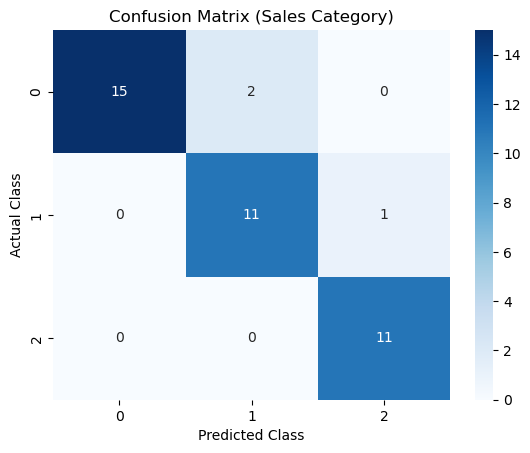

In [16]:
# Convert regression outputs into bins (3 classes)
bin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_test_class = bin.fit_transform(y_test.values.reshape(-1, 1)).astype(int).flatten()
y_pred_class = bin.transform(y_pred.reshape(-1, 1)).astype(int).flatten()

# Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print("\nConfusion Matrix (after binning):")
print(cm)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix (Sales Category)")
plt.show()